# Программирование и компьютерные науки

## Семинар 9

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Разреженные матрицы

Разреженная матрица — это матрица, большинство элементов которой равны нулю. Такие матрицы возникают во многих областях науки, в том числе и в машинном обучении.

Для разреженных матриц можно определить следующие характеристики:
- разреженность (sparsity) — доля нулевых элементов матрицы,
- плотность (density) — доля ненулевых элементов матрицы, или $1 - \text{sparsity}$.

Для разреженных матриц существуют специальные способы их хранения в памяти компьютера, при которых хранятся только ненулевые значения, тем самым сокращается объём занимаемой памяти. Эти способы реализованы в библиотеке [scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html). Кроме того, разреженные матрицы поддерживаются большинством реализаций методов машинного обучения.

In [2]:
import numpy as np
import scipy.sparse as sp

### COOrdinate format

[Координатный формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix) задаёт матрицу при помощи троек (индекс строки, индекс столбца, значение элемента), описывающих ненулевые элементы матрицы. Как правило, тройки сортируют по индексу строки, а затем индексу столбца для ускорения работы. 

Объём занимаемой памяти — $O(n),$ где $n$ — число ненулевых элементов в матрице.

In [3]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.coo_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
for i in range(len(sparse_m.data)):
    print('(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i]))

(0, 0, 1)
(0, 1, 2)
(0, 2, 3)
(1, 0, 4)
(1, 1, 5)
(1, 2, 6)
(2, 0, 7)
(2, 1, 8)
(2, 2, 9)


Для матрицы, содержащей нулевые элементы, имеем:

In [5]:
m = np.eye(3)*np.arange(1,4)
print(m)
sparse_m = sp.coo_matrix(m)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


In [7]:
for i in range(len(sparse_m.data)):
    print('(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i]))

(0, 0, 1)
(1, 1, 2)
(2, 2, 3)


### Compressed Sparse Row matrix

[CSR формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) — разреженная по строчкам матрица. 

<img src="https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/arrays.png?raw=1">

Формат задаёт матрицу при помощи трёх массивов:
1. $i$-ый элемент первого массива соответствует $i$-ой строке и содержит индекс некоторого элемента во втором массиве.
2. Во втором массиве по порядку для каждой строки записаны индексы столбцов ненулевых элементов.
3. Третий массив имеет такую же длину, как и второй, и содержит значения соответствующих ненулевых элементов.

Обозначим описанные массивы $a,b,c$. Для получения элемента матрицы на позиции $(i, j)$ необходимо осуществить следующую последовательность действий:
1. Получить значения $a[i]=k_{left}, a[i+1]=k_{right}$.
2. Тогда индексы столбцов ненулевых элементов $i$-ой строки будут находиться в "подмассиве" $b[k_{left}:k_{right}]$.
3. В цикле перебираем элементы подмассива $b[k_{left}:k_{right}]$, пока не встретим элемент, равный $j$.
4. Если такой элемент обнаружен на позиции $m$ (в терминах массива $b$), то ответом является значение $c[m]$.
5. Иначе ответом является 0.если мы не встретили элемент, равный $j$, то возвращаем $0$.

Объём занимаемой памяти — $O(n)$, где $n$ — число ненулевых элементов.

In [10]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.csr_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [11]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 2 3 4 5 6 7 8 9]


Для матрицы, содержащей нулевые элементы:

In [12]:
m = np.tril(np.arange(1,4))
print(m)
sparse_m = sp.csr_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [13]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 1 3 6]
b [0 0 1 0 1 2]
c [1 1 2 1 2 3]


### Compressed Sparse Column matrix

[CSC формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix) — разреженная по столбцам матрица. 

Формат CSC задаёт матрицу аналогично формату CSR, но при этом элементы первого массива соответствуют столбцам, а не строкам.

Объём занимаемой памяти — $O(n)$, где $n$ — число ненулевых элементов.

In [15]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.csc_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [16]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 4 7 2 5 8 3 6 9]


In [17]:
m = np.tril(np.arange(1,4))
print(m)
sparse_m = sp.csc_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [18]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 5 6]
b [0 1 2 1 2 2]
c [1 1 1 2 2 3]


## Умножение разреженных матриц

Как мы убедились, объём занимаемой памяти практически не отличается для всех вариантов хранения разреженных матриц. В таком случае использование какого из вариантов даёт больше преимуществ? Оказывается, что все три способа кардинально различаются по времени умножения матриц.

Для начала вспомним правило умножения матриц:
$$C = A\cdot B$$
$$C_{ij} = \sum_k A_{ik}B_{kj}$$

Для нахождения элемента $C_{ij}$ необходимо получить $i$-ую строчку матрицы $A$ и $j$-ый столбец матрицы $B$. Исследуем время выполнения этих операций для каждого из форматов:

- **COO.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(n)$. При условии, что тройки отсортированы, время поиска можно сократить, воспользовавшись бинарным поиском.
- **CSR.** Стоимость получения строки — $O(1)$. Стоимость получения столбца — $O(n)$.
- **CSC.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(1)$.

Таким образом, время перемножения матриц будет оптимальным, если матрица $A$ задаётся в формате CSR, а матрица $B$ — в формате CSC.

## Работа с текстовыми данными

Разреженные матрицы имеют место в машинном обучении, в частности, в задачах обработки текстов. 

Как правило, модели машинного обучения действуют в предположении, что матрица "объект-признак" является вещественнозначной, поэтому при работе с текстами сперва для каждого из них необходимо составить его признаковое описание. Для этого широко используются техники векторизации, tf-idf и пр. Рассмотрим их на примере датасета отзывов о банках.

Сперва загрузим данные:

In [42]:
import json

import bz2
import regex
from tqdm import tqdm

In [20]:
!wget -O banki_responses.json.bz2 -q https://www.dropbox.com/s/7v3s14tu0cy7cnv/banki_responses.json.bz2?dl=0

In [49]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked']:
            responses.append(resp)

201030it [00:50, 3990.53it/s]


Данные содержат тексты отзывов о банках, некоторую дополнительную информацию, а также оценку банка от 1 до 5. Посмотрим на пример отзыва:

In [52]:
interesting_responses = list(filter(lambda r: u'отвратительно' in r['text'], responses))
print(interesting_responses[0]['text'])

Банк отказывается возвращать депозит после окончания срока действия договора. Предлагает обращаться в ЦО, где в порядке живой очереди можно забирать не более 500$/день в порядке живой очереди. Налицо отвратительное отношение к вкладчикам. Советую всем обращаться с жалобой в ЦБ и роспотребнадзор.


Приведём текст отзыва в нижний регистр, а также избавимся от всех символов, кроме кириллицы:

In [55]:
print(regex.sub(r'[^\p{Cyrillic}]', ' ', interesting_responses[0]['text'].lower()))

банк отказывается возвращать депозит после окончания срока действия договора  предлагает обращаться в цо  где в порядке живой очереди можно забирать не более      день в порядке живой очереди  налицо отвратительное отношение к вкладчикам  советую всем обращаться с жалобой в цб и роспотребнадзор 


Сформируем выборку отзывов, предобработав их аналогичным образом, и вектор ответов:

In [57]:
responses = list(filter(lambda r: r['rating_grade'] is not None, responses))
texts = list(map(lambda r: regex.sub(r'[^\p{Cyrillic}]', ' ', r['text'].lower()), responses))
ratings = list(map(lambda r: r['rating_grade'], responses))

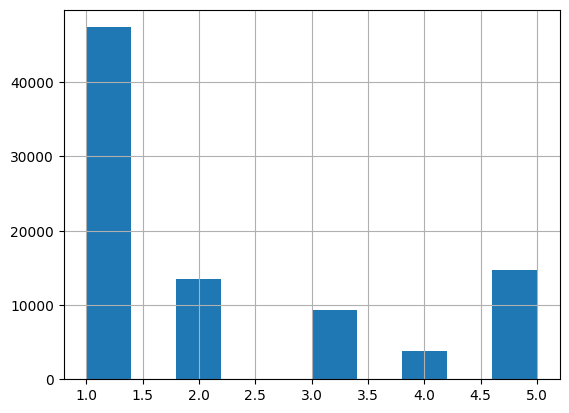

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(ratings)
plt.grid()

### Векторизация

Самый очевидный способ формирования признакового описания текстов — векторизация. Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
%%time
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

CPU times: user 14.6 s, sys: 178 ms, total: 14.8 s
Wall time: 14.9 s


Результатом является разреженная матрица.

In [72]:
vectorizer.transform(texts[:1])

<1x72477 sparse matrix of type '<class 'numpy.int64'>'
	with 166 stored elements in Compressed Sparse Row format>

In [73]:
vectorizer.transform(texts[:1]).data

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 7, 1, 1, 8, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1])

### TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
%%time
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

CPU times: user 14.4 s, sys: 161 ms, total: 14.5 s
Wall time: 14.6 s


На выходе получаем разреженную матрицу.

In [75]:
vectorizer.transform(texts[:1])

<1x72477 sparse matrix of type '<class 'numpy.float64'>'
	with 166 stored elements in Compressed Sparse Row format>

In [76]:
vectorizer.transform(texts[:1]).data

array([0.05140577, 0.12668783, 0.10612272, 0.08193637, 0.0248289 ,
       0.05166677, 0.03590111, 0.05129787, 0.08873269, 0.09454437,
       0.05191242, 0.12550273, 0.03851543, 0.04464916, 0.04226121,
       0.08159327, 0.07495108, 0.198989  , 0.08752852, 0.07894877,
       0.04408565, 0.07335611, 0.11606197, 0.08795419, 0.04919692,
       0.08525054, 0.06207737, 0.04037283, 0.03823641, 0.03951032,
       0.12441254, 0.04981359, 0.05392155, 0.10501699, 0.03027151,
       0.09732307, 0.10167839, 0.1182089 , 0.11151977, 0.04671403,
       0.03496325, 0.12389851, 0.03260637, 0.04823129, 0.07020873,
       0.04905738, 0.12389851, 0.08545894, 0.10514369, 0.08125861,
       0.09431253, 0.07115122, 0.09173376, 0.03312771, 0.07837006,
       0.06430327, 0.08082481, 0.09402818, 0.08202934, 0.08125861,
       0.05805574, 0.06574112, 0.06701952, 0.09538836, 0.05215997,
       0.13847157, 0.12036393, 0.05724585, 0.12389851, 0.08267406,
       0.08738954, 0.06379865, 0.04645995, 0.08528012, 0.03329

Заметим, что оба метода возвращают вектор длины 72477 (размер нашего словаря).

## Лемматизация и стемминг

Заметим, что одно и то же слово может встречаться в различных формах (например, "сотрудник" и "сотрудника"), но описанные выше методы интерпретируют их как различные слова, что делает признаковое описание избыточным. Устранить эту проблему можно при помощи **лемматизации** и **стемминга**.

### Стемминг

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) –  это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду.

**Примеры стемминга:**

| Word        | Stem           |
| ----------- |:-------------:|
| вагон | вагон |
| вагона | вагон |
| вагоне | вагон |
| вагонов | вагон |
| вагоном | вагон |
| вагоны | вагон |
| важная | важн |
| важнее | важн |
| важнейшие | важн |
| важнейшими | важн |
| важничал | важнича |
| важно | важн |

[Snowball](http://snowball.tartarus.org/) – фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке – списки окончаний для разных частей речи, разных склонений и т.д. Пример алгоритма для русского языка – [Russian stemming](http://snowballstem.org/algorithms/russian/stemmer.html).

In [77]:
import nltk

In [78]:
stemmer = nltk.stem.snowball.RussianStemmer()
print(stemmer.stem(u'машинное'), stemmer.stem(u'обучение'))

машин обучен


In [79]:
def stem_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: stemmer.stem(w), tokens))

stemmed_texts = []
for t in tqdm(texts[:1000]):
    stemmed_texts.append(stem_text(t, stemmer))

100%|██████████| 1000/1000 [00:07<00:00, 140.84it/s]


In [83]:
print(texts[4])

для оплаты коммунальных платежей пользуюсь пластиковой картой и сайтом банка  с некоторых пор оплатить отчисления на капремонт стало невозможно  программа требует ввести лицевой счет  это номер квартиры   а после ввода пишет что счет не найден  при внешнем переводе из другого банка сумма возвращается обратно  т к  счет не найден  прошу проверить наличие счета                      и возможность его пополнения 


In [82]:
print(stemmed_texts[4])

для оплат коммунальн платеж польз пластиков карт и сайт банк с некотор пор оплат отчислен на капремонт стал невозможн программ треб ввест лицев счет эт номер квартир а посл ввод пишет что счет не найд при внешн перевод из друг банк сумм возвраща обратн т к счет не найд прош провер налич счет и возможн ег пополнен


In [84]:
len(texts)

88658

К сожалению, стеммер русского языка работает довольно медленно, – 1000 отзывов обрабатываются за 7 секунд, поэтому время обработки всей выборки можно грубо оценить в 23 минуты. В связи с этим в рамках семинара мы не будем проводить полную обработку всей выборки, однако вы можете проверить результат работы самостоятельно.

### Лемматизация

[Лемматизация](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

## Классификация

Воспользуемся изученными методами обработки текстов для решения задачи классификации отзывов на отзывы с положительной оценкой и отзывы с отрицательной оценкой. Будем считать отзывы с оценками 4-5 положительными, а остальные — отрицательными.

In [85]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

In [86]:
X = vectorizer.transform(texts)
Y = (np.array(ratings) > 3).astype(int)

In [94]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [97]:
cv = ShuffleSplit(n_splits=1, test_size=0.3)
cv

ShuffleSplit(n_splits=1, random_state=None, test_size=0.3, train_size=None)

In [104]:
cv = ShuffleSplit(n_splits=1, test_size=0.3)
for train_ids, test_ids in cv.split(X):
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:,1]
    print('ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], preds), 
                                        accuracy_score(Y[test_ids], (preds > 0.5).astype(int))))

ROC-AUC: 0.963, ACC: 0.941


In [105]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

In [106]:
X = vectorizer.transform(texts)
Y = (np.array(ratings) > 3).astype(int)

In [107]:
cv = ShuffleSplit(n_splits=1, test_size=0.3)
for train_ids, test_ids in cv.split(X):
    lr = LogisticRegression()
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:,1]
    print('ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], preds), 
                                        accuracy_score(Y[test_ids], (preds > 0.5).astype(int))))

ROC-AUC: 0.975, ACC: 0.945


## Важность признаков

Как уже упоминалось ранее, веса признаков в линейной модели в случае, если признаки отмасштабированы, характеризуют степень их влияния на значение целевой переменной. В задаче классификации текстов, кроме того, признаки являются хорошо интерпретируемыми, поскольку каждый из них соответствует конкретному слову. Изучим влияние конкретных слов на значение целевой переменной:

In [109]:
f_weights = zip(vectorizer.get_feature_names_out(), lr.coef_[0])
f_weights = sorted(f_weights, key=lambda i: i[1])
for i in range(1,30):
    print('%s, %.2f' % f_weights[-i])
    
print('...')
for i in reversed(range(1,30)):
    print('%s, %.2f' % f_weights[i])

спасибо, 13.27
приятно, 10.73
благодарность, 8.82
быстро, 8.14
доволен, 6.73
поблагодарить, 6.17
очень, 5.68
оперативно, 5.65
оперативность, 5.23
всегда, 5.14
молодцы, 5.12
вопросы, 5.03
очередей, 5.02
понравилось, 4.91
все, 4.48
проблем, 4.47
выразить, 4.34
нравится, 4.30
большое, 4.18
удобно, 4.09
хочу, 4.08
сразу, 4.00
отметить, 4.00
ткс, 3.98
оценку, 3.91
целом, 3.89
четко, 3.87
положительный, 3.73
банков, 3.73
...
опять, -2.46
пор, -2.47
звонки, -2.47
неужели, -2.48
час, -2.53
могут, -2.55
дозвониться, -2.59
ладно, -2.65
вопрос, -2.66
что, -2.66
клиентов, -2.68
сегодня, -2.69
говорят, -2.76
часа, -2.85
ничего, -2.88
якобы, -2.89
нельзя, -2.93
звоню, -2.96
сказали, -3.01
должен, -3.05
видимо, -3.09
нет, -3.36
невозможно, -3.39
никто, -3.51
ответа, -3.54
почему, -3.75
зачем, -3.94
вы, -3.95
ответ, -4.32
